### Tasca M8 T01 ### 

Exercicis d'algoritmes d'Agrupació.

- Exercici 1: 
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means. Important: Tingues en compte que prèviament et caldrà preparar el dataset.

- Exercici 2: 
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

- Exercici 3:
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime 

from scipy import stats #shapiro
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA # mètode PCA
from sklearn.cluster import KMeans, AgglomerativeClustering # Cluster
import kneed
from kneed import KneeLocator # verificar número ideal de clusters
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster #calculo matrices de vinculos


#Exercici 2
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#Exercici 3
from sklearn.metrics import silhouette_score #Calcula el rendiment del clustering


In [56]:
cd /Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 8/

/Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 8


In [57]:
dfO = pd.read_csv('Publicacions Facebook Thailandia.csv')

In [58]:
dfO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [59]:
pd.options.display.float_format = '{:.2f}'.format
dfO.describe().round(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,0.00,0.00,0.00,0.00
mean,230.12,224.36,40.02,215.04,12.73,1.29,0.70,0.24,0.11,NaN,NaN,NaN,NaN
std,462.63,889.64,131.60,449.47,39.97,8.72,3.96,1.60,0.73,NaN,NaN,NaN,NaN
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
25%,17.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
50%,59.50,4.00,0.00,58.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
75%,219.00,23.00,4.00,184.75,3.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
max,4710.00,20990.00,3424.00,4710.00,657.00,278.00,157.00,51.00,31.00,NaN,NaN,NaN,NaN


In [60]:
dfO.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


**Conjunto de datos sobre patrones de uso y participación de vendedores de Facebook Live en Tailandia** 

Datos extraídos de la plataforma Facebook, por API de desarrolladores de Facebook, representando las métricas de participación de los usuarios de la misma, en relación a publicaciones de10 vendedores minoristas de moda y cosméticos tailandeses desde marzo de 2012 hasta junio de 2018.

Estructura de datos bidimensional, compuesta de 16 columnas (4 inútiles)y 7050 filas.

La mayoría de las columnas son de tipo entero y representan diferentes tipos de reacciones relacionadas con interacciones en una plataforma social.

Las últimas cuatro columnas (Column1 a Column4) no contienen información y podrían eliminarse para limpiar y simplificar la estructura del DataFrame.

**COLUMNAS**:

1.- **Status_id**: vemos claramente que está compuesta de dos partes, luego miraremos si tiene sentido dividirla.

2- 	**Status type**:
    - texto
    - videos diferidos
    - videos en vivo
    - imágenes

3.- **Status_published*+: día y hora. No creo que se necesite. 

4.- Reacciones /EMOCIONES (aplicar dummies):

    3.1.- "**me gusta/like**"
    3.2.- "**amor/love**"
    3.3.- "**sorpresa/guau**"
    3.4.- "**risa/jaja**"
    3.5.- "**triste**"
    3.5.- "**enojado**".

In [61]:
dfO[dfO.columns[0]].value_counts()

819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: status_id, Length: 6997, dtype: int64

In [62]:
(dfO.isna().sum().sum(), dfO.isnull().sum().sum(),)

(28200, 28200)

In [63]:
dfO.duplicated().sum()

51

In [64]:
df=dfO.copy()

In [65]:
df=dfO.drop_duplicates()

Elimino las columnas fecha (día - hora) y status (user - publi), aunque anteriormente las había separado. Luego he llegado a la conclusión que no las necesito para este ejercicio: 

In [66]:
df[['publi', 'user']] = df['status_id'].str.split('_', expand=True)
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')
df['fecha'] = df['status_published'].dt.date
df['hora'] = df['status_published'].dt.time

columns_to_drop = ['status_id', 'Column1', 'Column2', 'Column3', 'Column4','status_published','user','fecha','hora']
df = df.drop(columns=columns_to_drop)
df = df.reset_index(drop=True)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publi
0,video,529,512,262,432,92,3,1,1,0,246675545449582
1,photo,150,0,0,150,0,0,0,0,0,246675545449582
2,video,227,236,57,204,21,1,1,0,0,246675545449582
3,photo,111,0,0,111,0,0,0,0,0,246675545449582
4,photo,213,0,0,204,9,0,0,0,0,246675545449582
...,...,...,...,...,...,...,...,...,...,...,...
6994,photo,89,0,0,89,0,0,0,0,0,1050855161656896
6995,photo,16,0,0,14,1,0,1,0,0,1050855161656896
6996,photo,2,0,0,1,1,0,0,0,0,1050855161656896
6997,photo,351,12,22,349,2,0,0,0,0,1050855161656896


In [67]:
df['publi'].unique()

array(['246675545449582', '134115277150304', '146481362756646',
       '117059915488335', '848451358648417', '725980084255106',
       '614855718638584', '819700534875473', '1050855161656896'],
      dtype=object)

Analizo el repartimiento de las variables categóricas para hacerme una idea de la distribución de datos.

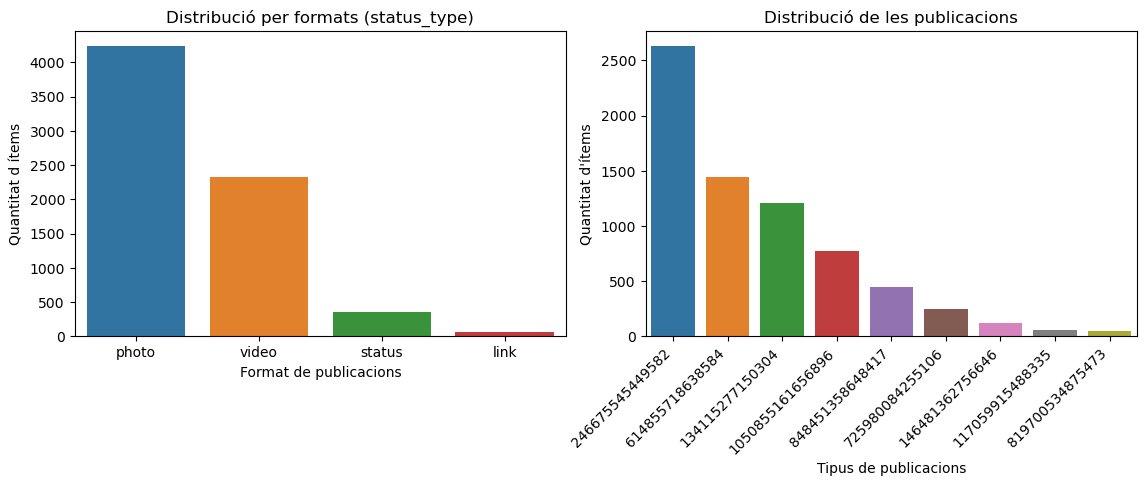

In [68]:
count_status = df['status_type'].value_counts()
count_publi = df['publi'].value_counts()

# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas

# Subgráfico 1 - Count_status
sns.barplot(x=count_status.index, y=count_status.values, ax=axes[0])
axes[0].set_title('Distribució per formats (status_type)')
axes[0].set_xlabel('Format de publicacions')
axes[0].set_ylabel('Quantitat d ítems')

# Subgráfico 2 - Count_publi
sns.barplot(x=count_publi.index, y=count_publi.values, ax=axes[1])
axes[1].set_title('Distribució de les publicacions')
axes[1].set_xlabel('Tipus de publicacions')
axes[1].set_ylabel('Quantitat d\'ítems')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para una mejor legibilidad

# Mostrar los subgráficos
plt.show()


- Observamos que foto  es el que contiene más ítems, precedido de video y status, con link casi insignificante.
- Por lo que se refiere a las publicaciones, solo las tres últimas tienen una cantidad parecida de ítems. Existe mucha diferencia entre la cantidad de ítems de cada publicación. 

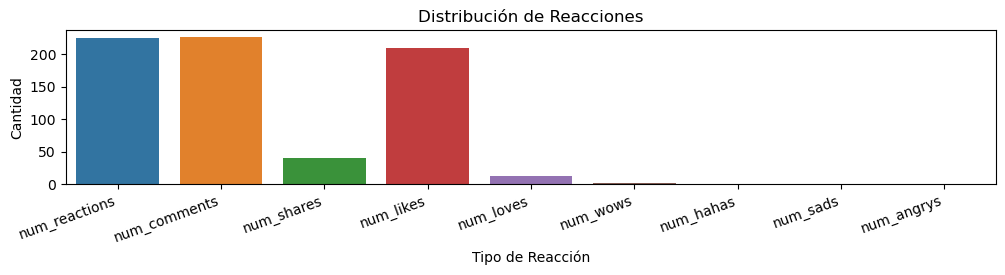

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
reactions_data = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

# Crear el gráfico de barras
plt.figure(figsize=(12, 2))
sns.barplot(data=reactions_data, ci=None)

# Añadir etiquetas y título
plt.xlabel('Tipo de Reacción')
plt.ylabel('Ítems')
plt.title('Distribución de Reacciones')
plt.xticks(rotation=20, ha='right') 

# Mostrar el gráfico
plt.show()


- Apreciamos, en 3 los tipos de reacciones que más cantidad de ítems tienen, ítmes parecidos. En segundo lugar shares y loves, y en cantidades insignificantes o nulas, el resto.

In [74]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00
mean,224.99,225.55,40.26,209.95,12.75,1.25,0.70,0.23,0.11
std,452.88,892.74,132.05,439.55,40.11,8.73,3.97,1.48,0.69
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00
50%,58.00,4.00,0.00,57.00,0.00,0.00,0.00,0.00,0.00
75%,216.00,22.00,4.00,182.00,3.00,0.00,0.00,0.00,0.00
max,4710.00,20990.00,3424.00,4710.00,657.00,278.00,157.00,51.00,31.00


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    6999 non-null   object
 1   num_reactions  6999 non-null   int64 
 2   num_comments   6999 non-null   int64 
 3   num_shares     6999 non-null   int64 
 4   num_likes      6999 non-null   int64 
 5   num_loves      6999 non-null   int64 
 6   num_wows       6999 non-null   int64 
 7   num_hahas      6999 non-null   int64 
 8   num_sads       6999 non-null   int64 
 9   num_angrys     6999 non-null   int64 
 10  publi          6999 non-null   object
dtypes: int64(9), object(2)
memory usage: 601.6+ KB


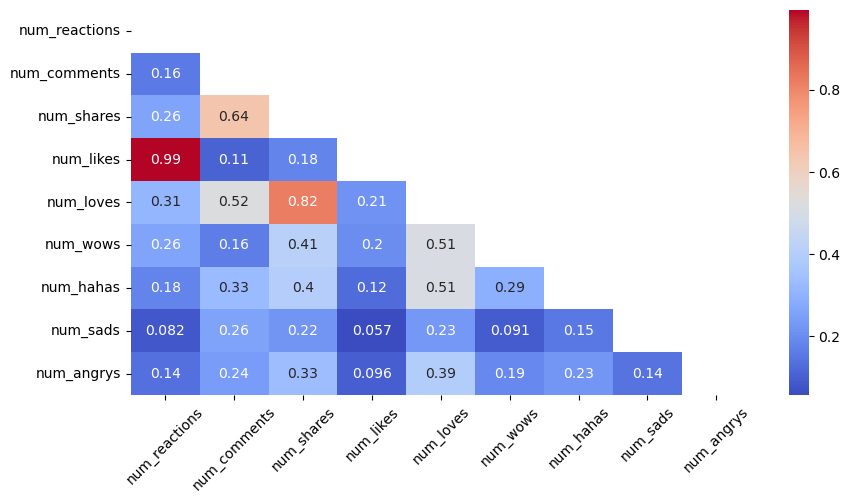

In [76]:
df_corr = df.corr()  # Calcular la matriz de correlación
num_rows, num_cols = df_corr.shape
mask = np.triu(np.ones((num_rows, num_cols), dtype=bool))

# Crear la figura para el mapa de calor
plt.figure(figsize=(10, 5))

# Crear el mapa de calor con la máscara
sns.heatmap(df_corr, annot=True, cmap='coolwarm', mask=mask)
plt.xticks(rotation=45)

# Mostrar el mapa de calor
plt.show()


- Observamos fuerte correlación entre los likes y las reacciones. Y bastante alte entre los loves y shares. 

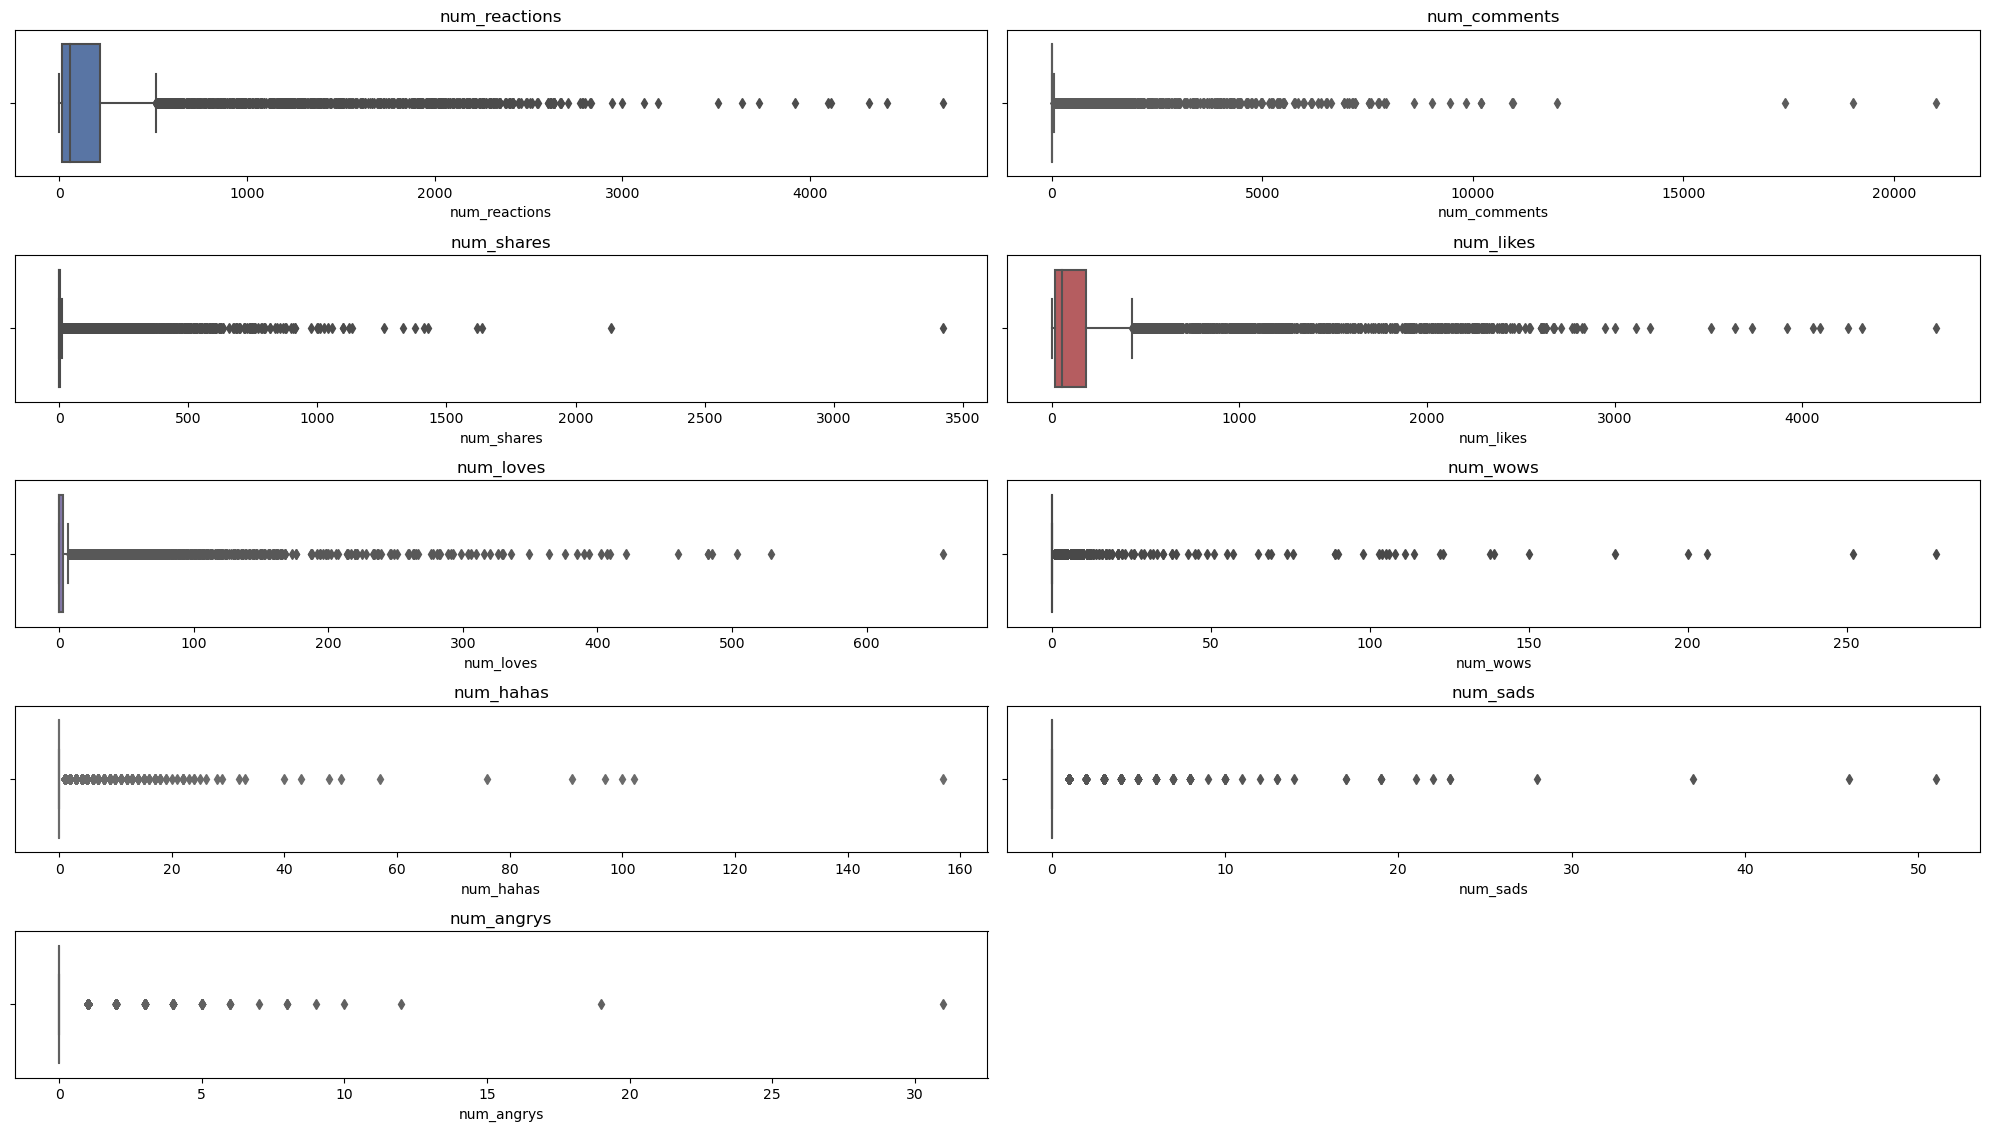

In [77]:
numeric_columns = df.select_dtypes(include=['number']).columns

num_columns = 2

plt.figure(figsize=(20, 20))
palette = sns.color_palette("deep", n_colors=14)

for i, column in enumerate(numeric_columns):
    plt.subplot(9, num_columns, i + 1)
    
    # Verificar si la columna es numérica antes de dibujar el boxplot
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[column], orient="h", color=palette[i])
        plt.title(f'{column}')
        plt.tight_layout()


- vemos que todas las columnas tienen outliers, con lo que deberemos optimizar con el robust scaler.
Compruebo si hay distribuciones normales:

In [78]:
from scipy.stats import shapiro
def distr_normal(df):
    normal = []
    for col in df.columns:
        p_valor = shapiro(df[col])[1]
        normal.append(p_valor > 0.05) 
    return normal
resultado = distr_normal(df.select_dtypes(include=['float','int']))
print(resultado)

[False, False, False, False, False, False, False, False, False]


- Aplicamos el Robust scaler para estandarizar las variables de reacciones:

In [79]:
robust_emoji = RobustScaler()
columns = ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']
df[columns] = robust_emoji.fit_transform(df[columns])
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publi
0,video,2.37,23.09,65.50,2.27,30.67,3.00,1.00,1.00,0.00,246675545449582
1,photo,0.46,-0.18,0.00,0.56,0.00,0.00,0.00,0.00,0.00,246675545449582
2,video,0.85,10.55,14.25,0.89,7.00,1.00,1.00,0.00,0.00,246675545449582
3,photo,0.27,-0.18,0.00,0.33,0.00,0.00,0.00,0.00,0.00,246675545449582
4,photo,0.78,-0.18,0.00,0.89,3.00,0.00,0.00,0.00,0.00,246675545449582
...,...,...,...,...,...,...,...,...,...,...,...
6994,photo,0.16,-0.18,0.00,0.19,0.00,0.00,0.00,0.00,0.00,1050855161656896
6995,photo,-0.21,-0.18,0.00,-0.26,0.33,0.00,1.00,0.00,0.00,1050855161656896
6996,photo,-0.28,-0.18,0.00,-0.34,0.33,0.00,0.00,0.00,0.00,1050855161656896
6997,photo,1.47,0.36,5.50,1.77,0.67,0.00,0.00,0.00,0.00,1050855161656896


- Pasaremos a dummies status type a fin de tener 4 categorías separadas del formato de la publicación. (link, fotos, status, video)
- Haremos lo mismo con las 9 publis a fin de tenerlas por separado (pub de 1 a 9).

In [81]:
df = pd.concat([df.drop('status_type', axis=1), pd.get_dummies(df['status_type'])], axis=1)
df = pd.concat([df.drop('publi', axis=1), pd.get_dummies(df['publi'])], axis=1)

In [54]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,6989,6990,6991,6992,6993,6994,6995,6996,6997,6998
num_reactions,2.37,0.46,0.85,0.27,0.78,0.80,2.24,1.19,0.73,0.56,...,0.18,-0.25,-0.27,0.69,0.14,0.16,-0.21,-0.28,1.47,-0.21
num_comments,23.09,-0.18,10.55,-0.18,-0.18,0.09,27.73,20.41,-0.14,0.23,...,1.00,-0.18,-0.18,-0.09,-0.18,-0.18,-0.18,-0.18,0.36,-0.18
num_shares,65.50,0.00,14.25,0.00,0.00,0.00,18.00,13.25,0.00,0.25,...,8.50,0.00,0.00,0.75,0.00,0.00,0.00,0.00,5.50,0.00
num_likes,2.27,0.56,0.89,0.33,0.89,0.93,2.19,1.23,0.85,0.67,...,0.20,-0.30,-0.32,0.84,0.18,0.19,-0.26,-0.34,1.77,-0.24
num_loves,30.67,0.00,7.00,0.00,3.00,1.67,23.33,10.67,1.67,1.00,...,1.00,0.67,0.00,0.33,0.00,0.00,0.33,0.33,0.67,0.00
num_wows,3.00,0.00,1.00,0.00,0.00,1.00,10.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
num_hahas,1.00,0.00,1.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
num_sads,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
num_angrys,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
link,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [86]:
col_pub = ['1050855161656896', '117059915488335', '134115277150304', '146481362756646', '246675545449582', '614855718638584', '725980084255106', '819700534875473', '848451358648417']
col_reac = ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']
col_stat= ['video', 'photo', 'link', 'status']

df_pub = df[col_pub]
df_reac = df[col_reac]
    df_stat = df[col_stat] # guardo 3 df per comparativa posterior

## Exercici 1: Classifica els diferents registres utilitzant l'algorisme de K-means.

- Ahora ya podemos aplicar el PCA a las variables numéricas para reducir la información de los datos, reduciendo la complejidad y dimensionalidad. Me permitirá trabajar con un conjunto más pequeño de 'direcciones' (componentes principales).

- PCA ayuda a decorrelacionar las variables originales al expresar los datos en términos de los nuevos componentes principales.

- Sabremos cuánto de la variabilidad original de tus datos se captura en cada componente principal y cuántos componentes principales necesitarías para explicar una proporción significativa de la varianza total.

In [239]:
# Selecciona solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_data = df[numeric_columns]

pca = PCA() # por el momento vacío para poder mostrar componentes, variancia,... 
pca.fit(numeric_data)

# Valores exactos del PCA
components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Imprimir los valores
print("Principal Components:")
print(components)
print("\nExplained Variance:")
print(explained_variance)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Principal Components:
[[ 1.05741684e-02  7.81601768e-01  5.87060701e-01  8.50792413e-03
   1.99850163e-01  5.53052356e-02  3.29970454e-02  8.18004516e-03
   4.42332645e-03 -5.30581997e-05 -3.53752320e-03 -2.81260743e-04
   3.87184214e-03  1.04873556e-03  1.38810101e-05 -3.33015042e-04
   4.07971158e-04 -1.92836529e-03  4.25678750e-04  7.30296552e-04
  -3.23302083e-05 -3.32852492e-04  5.77330244e-03  5.77330244e-03]
 [ 1.68085793e-02 -6.21245846e-01  7.15896322e-01  1.40998460e-02
   2.78858568e-01  1.49824951e-01  2.82117919e-02 -9.79164547e-04
   4.79163048e-03 -2.66355397e-05 -2.36798125e-03 -2.43331269e-04
   2.63794806e-03 -2.33122794e-03 -7.03739749e-05 -8.28385890e-04
   1.40013858e-04 -1.68386569e-03  2.41399761e-03  2.39557986e-03
  -8.46091334e-06 -2.72769111e-05  1.02639155e-03  1.02639155e-03]
 [ 5.58776625e-02  5.05563537e-02 -3.35124213e-01  5.18950499e-02
   5.52863490e-01  7.45699664e-01  1.31584315e-01  9.93134545e-03
   1.06364526e-02 -7.16667442e-05  9.58104486e-05  4

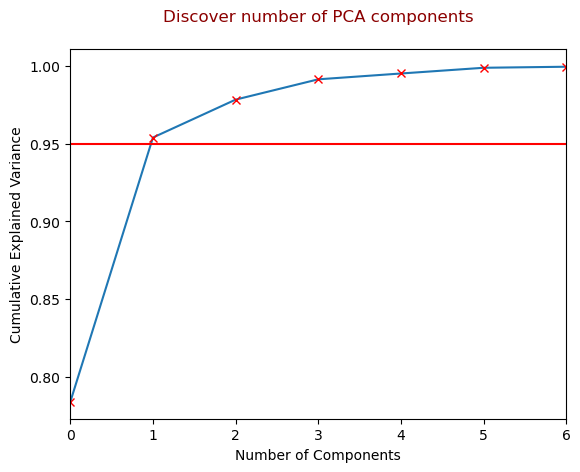

In [240]:
# Gráfico del acumulado
plt.plot(np.cumsum(explained_variance_ratio), marker="x", markersize=6, markeredgecolor='red')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim(0, 6)  # Establece el límite en el eje x hasta 5
plt.title("Discover number of PCA components", fontsize=12, pad=20, color='darkred')
plt.axhline(0.95, color = "r", linestyle = "-")
plt.show()

- Observamos que a partir del primer componente ya tenemos una varianza del 95%. Con lo que con solo ese componente ya reduciríamos la complejidad del df manteniendo una gran parte de la información original.
- Con el segundo componente ya estamos en el 98% casi.

Los valores propios están ordenados del más grande al más pequeño. El más grande significa que es la forma más importante de simplificación.

- Observamos un codo pronunciado en el gráfico, con caída en picado del componenete 1 al 2 y luego más suave del 2, al 3. 
- La caída abrupta sugiere que hay uno o más componentes que son particularmente informativos y capturan una cantidad sustancial de variabilidad en los datos.

- Después del codo, la disminución más gradual indica que los componentes restantes proporcionan menos ganancia adicional en términos de explicar la varianza. 

- Por lo que interpreto que en el componente 2 es el lugar donde la reducción adicional de la dimensionalidad tiene menos impacto en la cantidad total de información retenida.

- La curva se estabiliza después del tercer componente principal, puesto que los tres primeros componentes son los más informativos y que los componentes adicionales tienen menos impacto en la explicación de la varianza.

VAMOS A PEDIR AL PC QUE APLIQUE EL 95% DEL PORCENTAJE:

In [241]:
pca = PCA(0.95) # añado porcentaje
pca.fit(df[numeric_columns])
data_pca=df[numeric_columns].copy()
data_pca = pd.DataFrame(pca.transform(df[numeric_columns]), columns=["PC1", "PC2"], index=data_pca.index)
print("original shape:   ", df.shape)
print("transformed shape:", data_pca.shape)

original shape:    (6999, 24)
transformed shape: (6999, 2)


In [242]:
data_pca # df dels components

,PC1,PC2
0,48.15,39.28
1,-14.88,-2.24
2,3.37,3.44
3,-14.88,-2.25
4,-14.27,-1.40
...,...,...
6994,-14.88,-2.25
6995,-14.79,-2.15
6996,-14.82,-2.18
6997,-11.07,1.57


CREO UN DATAFRAME PARA VISUALIZAR LAS CARGAS DE CADA VARIABLE EN LOS COMPONTENTES PRINCIPALES Y ASÍ ENTENDER ALGO MÁS SOBRE LA VALORACIÓN

In [243]:
df_concat = pd.concat([df_stat, data_pca], axis=1) # guardar df_concat para luego df_jer
df_kmeans = df_concat.copy()
df_kmeans

,video,photo,link,status,PC1,PC2
0,1,0,0,0,48.15,39.28
1,0,1,0,0,-14.88,-2.24
2,1,0,0,0,3.37,3.44
3,0,1,0,0,-14.88,-2.25
4,0,1,0,0,-14.27,-1.40
...,...,...,...,...,...,...
6994,0,1,0,0,-14.88,-2.25
6995,0,1,0,0,-14.79,-2.15
6996,0,1,0,0,-14.82,-2.18
6997,0,1,0,0,-11.07,1.57


- AQUI VEMOS LA RELACIÓN ENTRE LOS COMPONENTES MÁS IMPORTANTES: PC1 Y PC2

Realizo el algoritmo de K-Means con diferentes números de clusters (k) desde 1 hasta 9.
Calculo la suma de los cuadrados de las distancias intra-cluster (SSE)
Almaceno en una lista SSE

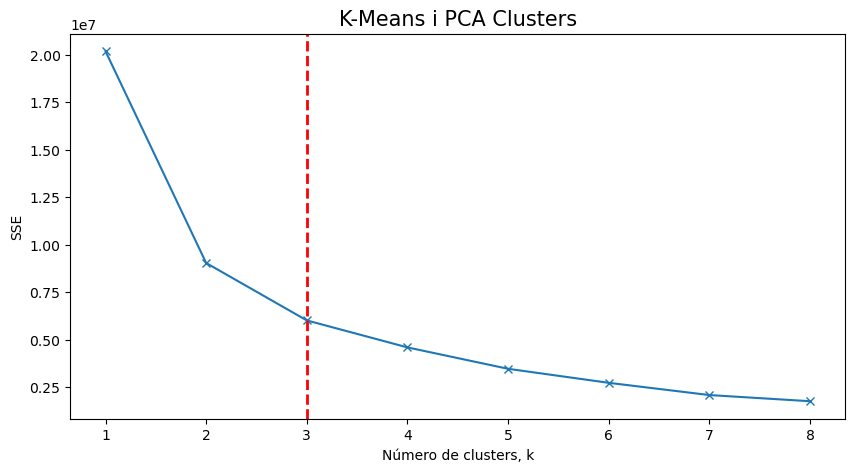

In [244]:
from sklearn.cluster import KMeans
ks = range(1, 9)
SSE = [] # suma de los cuadrados para separar instancias

for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state= 30) # semilla en 30, para siempre igual
    kmeans.fit(data_pca)
    
    # Append the inertia to the list of inertias
    SSE.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))    
plt.plot(ks, SSE, '-o', marker='x')
plt.axvline(x = 3, ymin = 0, color = 'red', linewidth =2, ls = '--' )
plt.xlabel('Número de clusters, k')
plt.ylabel('SSE')
plt.title('K-Means i PCA Clusters', fontsize=15)
plt.xticks(ks)
plt.show()

En la gráfica, no me queda claro si hay que usar el cluster 2, 3 o 4. Así que uso el kneeLocator para estar segura de utilizar el valor óptimo: 

In [245]:
kl = KneeLocator(ks, SSE, curve="convex", direction="decreasing")
print('Nombre óptim de clusters (k):', kl.elbow)

Nombre óptim de clusters (k): 3


- Vuelvo a utilizar kmeans con los clusters recomendados en el kneeLocateor y usando una semilla específica, la misma que antes.

In [246]:
# KMeans
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)

# Ajustar kmeans_pca al conjunto de datos
kmeans_pca.fit(df_kmeans)

# Predecir los clusters en el conjunto de datos combinado
y_pred = kmeans_pca.predict(df_kmeans)

# Añadir los resultados de la predicción al DataFrame
df_kmeans['Clusters'] = y_pred

# Mostrar el DataFrame combinado con los clusters
df_kmeans

,video,photo,link,status,PC1,PC2,Clusters
0,1,0,0,0,48.15,39.28,1
1,0,1,0,0,-14.88,-2.24,0
2,1,0,0,0,3.37,3.44,0
3,0,1,0,0,-14.88,-2.25,0
4,0,1,0,0,-14.27,-1.40,0
...,...,...,...,...,...,...,...
6994,0,1,0,0,-14.88,-2.25,0
6995,0,1,0,0,-14.79,-2.15,0
6996,0,1,0,0,-14.82,-2.18,0
6997,0,1,0,0,-11.07,1.57,0


Visualizo com se ha realizado la distribución por Clusters:

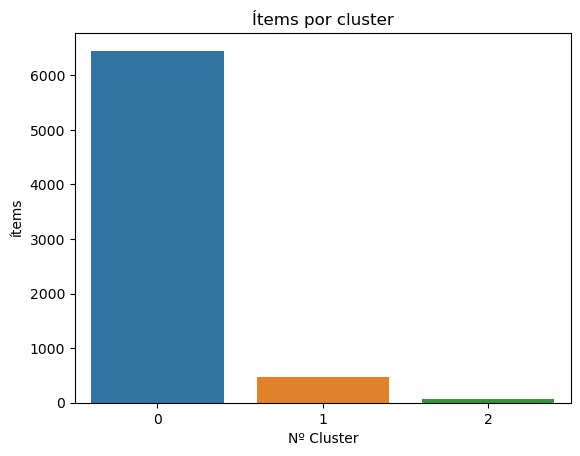

In [247]:
cluster = df_kmeans['Clusters'].value_counts()
sns.barplot(x=cluster.index, y=cluster.values)
plt.xlabel('Nº Cluster')
plt.ylabel('ítems')
plt.title('Ítems por cluster')
plt.show()

- Cluster 0 el que tiene la mayoría de valores. En 1 y 2 casi insignificante.

In [248]:
# Obtén la inercia (SSE)
sse = kmeans.inertia_
print("El SSE más bajo es", kmeans.inertia_,"\n")
print("Coordenadas de los centroides:", kmeans.cluster_centers_,"\n")
print("El número de iteraciones hasta alcanzar la convergencia fue", kmeans.n_iter_)

El SSE más bajo es 1755632.2504916582 

Coordenadas de los centroides: [[ -13.51337809   -1.98303082]
 [ 170.64088035   92.51816961]
 [ 188.78878542  -60.71444727]
 [  34.46299195   13.6288072 ]
 [ 732.90717717 -458.28121206]
 [ 399.86823828  309.64644566]
 [ 380.55567994  -78.55448884]
 [  95.2990377    26.03266818]] 

El número de iteraciones hasta alcanzar la convergencia fue 16


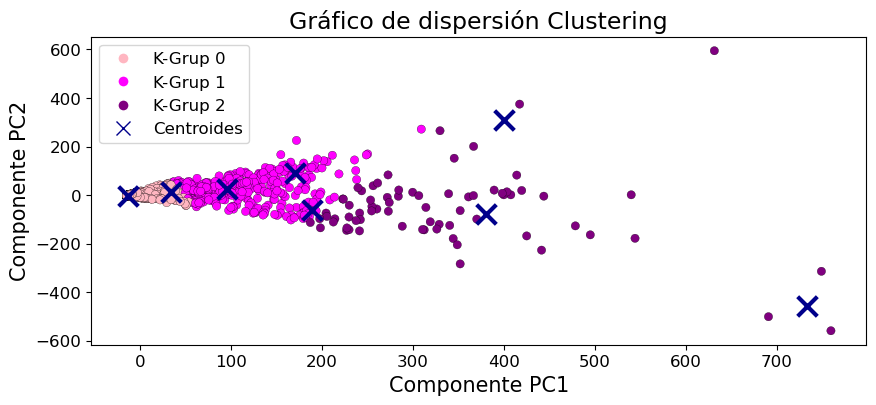

In [249]:
centr = kmeans.cluster_centers_
colors = ListedColormap(['#FFB6C1', '#FF00FF', '#800080'])
punts_legend = [
    plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 0', markerfacecolor='#FFB6C1', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 1', markerfacecolor='#FF00FF', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='K-Grup 2', markerfacecolor='#800080', markersize=8),
    plt.Line2D([0], [0], marker='x', color='darkblue', label='Centroides', markersize=10, linestyle='None')
]

plt.figure(figsize=(10, 4))
scatter = plt.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], c=y_pred, cmap=colors, edgecolors='black', linewidths=0.2)
plt.scatter(centr[:, 0], centr[:, 1], marker='x', s=200, linewidths=3, color='darkblue')
plt.title('Gráfico de dispersión Clustering', fontsize=17)
plt.legend(handles=punts_legend, prop={'size': 12})
plt.xlabel('Componente PC1', fontsize=15)
plt.ylabel('Componente PC2', fontsize=15)
plt.tick_params(labelsize=12)

plt.show()


- Observamos los 3 clusters bien diferenciados, aunque el cluster 0, tiene más densidad. El cluster 2 es el que tiene más dispersión. 

## Exercici 2: Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

Para el Clustering jerárquico, la mejor opción és crear un dendrograma. 

In [250]:
df_jer = df_kmeans.drop('Clusters', axis=1)
df_jer

,video,photo,link,status,PC1,PC2
0,1,0,0,0,48.15,39.28
1,0,1,0,0,-14.88,-2.24
2,1,0,0,0,3.37,3.44
3,0,1,0,0,-14.88,-2.25
4,0,1,0,0,-14.27,-1.40
...,...,...,...,...,...,...
6994,0,1,0,0,-14.88,-2.25
6995,0,1,0,0,-14.79,-2.15
6996,0,1,0,0,-14.82,-2.18
6997,0,1,0,0,-11.07,1.57


- Creo un dendrograma y determino un punto de corte visual donde veo que hay la máxima distancia de los ejes verticales. A fin de definir el número óptimo de Clusters.

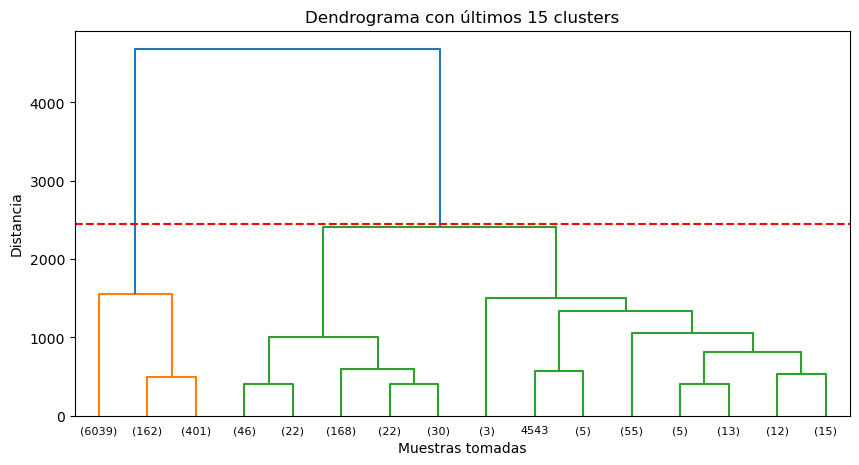

Número de clusters: 2


In [251]:
# Cálculo de la matriz
Z = linkage(df_jer.values, method='ward')

p = 16  #  Elijo número aleatório 
plt.figure(figsize=(10, 5))
dendrogram(Z,leaf_font_size=8,truncate_mode='lastp', p=p)

# Determino el punto de corte deseado (una vez visto donde la gráfica disminuye exageradmente)
max_d = 2450
clusters = fcluster(Z, max_d, criterion='distance')

plt.axhline(y=max_d, color='r', linestyle='--') 
plt.title('Dendrograma con últimos 15 clusters')
plt.xlabel('Muestras tomadas')
plt.ylabel('Distancia')
plt.show()

num_clusters = len(set(clusters))
print("Número de clusters:", num_clusters)

In [252]:
# Modelo clustering jerarquico:
jer = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
pred2 = jer.fit_predict(df_jer) # Predicciones, con el modelo del df_jer que es una copia del df_concat que ya tenía aplicado el PCA

df_jer['Clusters2'] = pred2 # Nueva columna con los clusters obtenidos en el clustering jerarquico:
df_jer

,video,photo,link,status,PC1,PC2,Clusters2
0,1,0,0,0,48.15,39.28,1
1,0,1,0,0,-14.88,-2.24,1
2,1,0,0,0,3.37,3.44,1
3,0,1,0,0,-14.88,-2.25,1
4,0,1,0,0,-14.27,-1.40,1
...,...,...,...,...,...,...,...
6994,0,1,0,0,-14.88,-2.25,1
6995,0,1,0,0,-14.79,-2.15,1
6996,0,1,0,0,-14.82,-2.18,1
6997,0,1,0,0,-11.07,1.57,1


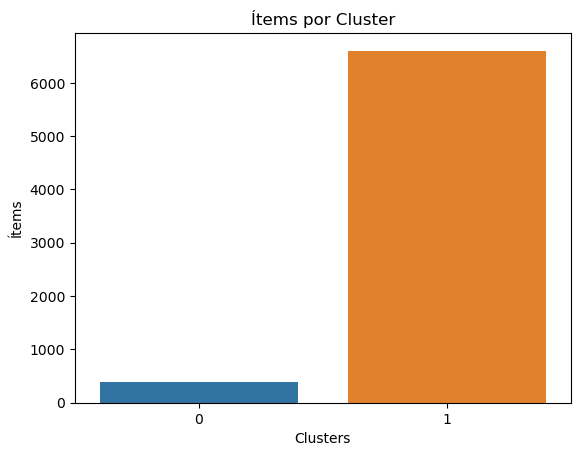

In [257]:
cluster_count = df_jer['Clusters2'].value_counts()

sns.barplot(x=cluster_count.index, y=cluster_count.values)
plt.xlabel('Clusters')
plt.ylabel('Ítems')
plt.title('Ítems por Cluster')
plt.show()

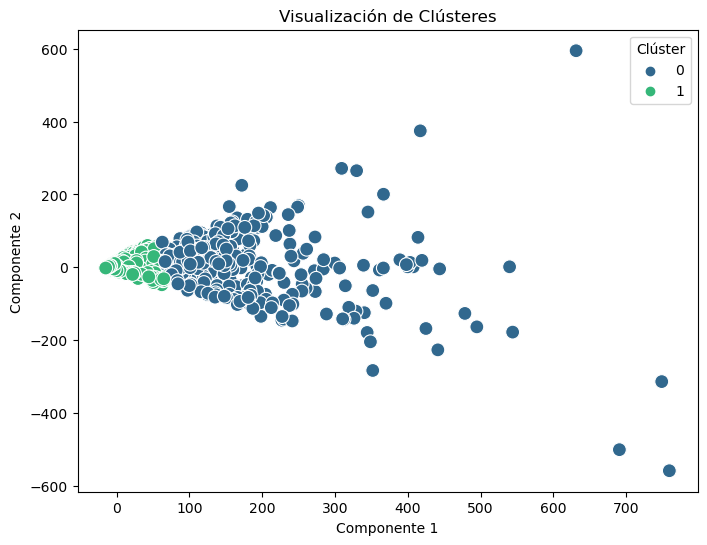

In [261]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_jer, hue='Clusters2', palette='viridis', s=100)
plt.title('Visualización de Clústeres')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

- Creo que ha sido una buena elección el número de clusterers (2) porque en el segundo ya se observa dispersión.

### Exercici 3: ###
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [265]:
kmeans_silhouette = silhouette_score(df_kmeans, y_pred)
jer_silhouette = silhouette_score(df_jer, pred2)

print("Rendimiento Kmeans: {:.2f}%".format(kmeans_silhouette * 100))
print("Rendimiento Jerárquico: {:.2f}%".format(jer_silhouette * 100))

Rendimiento Kmeans: 87.43%
Rendimiento Jerárquico: 89.18%


- Observamos mejor rendimiento aplicando el Clústering Jerárquico.